# Data Olympics

## Bike Sharing System
- Build and train a regression model on the Capital BikeShare (Washington, D.C.) Kaggle data set, in order to predict demand for bicycle rentals at any given hour, based on time- and weather-related features.

- The value in the count column is the one you need to predict.

#### Key steps:

1. Follow the machine learning process you learned from last week:
2. Explore which features correlate most with rental count.
3. What additional features can be extracted from the datetime column?
4. Try different kinds of regression models (e.g. Linear Regression, Random Forest Regressor, SVR).
5. Note that Kaggle evaluates the results of all submissions based on Root Mean Squared Log Error (RMSLE).
    - You can internally check your RMSLE score using sklearn:
    
            from sklearn.metrics import mean_squared_log_error

            np.sqrt(mean_squared_log_error(ypred))

### 1. Read the data in with pandas

In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


- **datetime** - hourly date + timestamp  
- **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- **holiday - whether the day is considered a holiday
- **workingday** - whether the day is neither a weekend nor holiday
- **weather**:
    1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- **temp** - temperature in Celsius
- **atemp** - "feels like" temperature in Celsius
- **humidity** - relative humidity
- **windspeed** - wind speed
- **casual** - number of non-registered user rentals initiated
- **registered** - number of registered user rentals initiated
- **count** - number of total rentals

In [4]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
# No missing data!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [6]:
def datetime(df):
    
    df = df.copy()

    df['date and time'] = pd.to_datetime(df['datetime'])

    df['year'] = df['date and time'].dt.year
    df['month'] = df['date and time'].dt.month
    df['day'] = df['date and time'].dt.day
    df['hour'] = df['date and time'].dt.hour
    df['day_of_week'] = df['date and time'].dt.dayofweek

    df.drop(columns=['datetime','date and time'], inplace=True)
    
    return df

In [7]:
dfcopy = datetime(df)

In [8]:
dfcopy.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_of_week
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


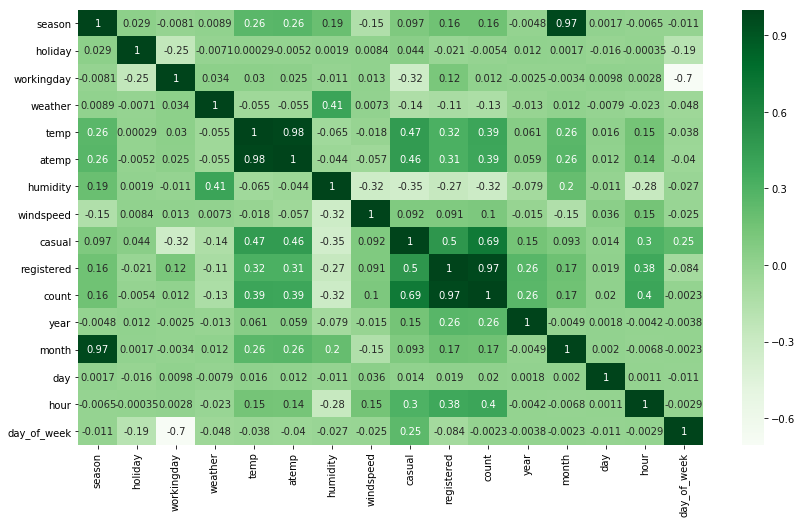

In [9]:
plt.figure(figsize=(14,8))
sns.heatmap(dfcopy.corr(), annot=True, cmap='Greens')

#### Count, Registered, and Casual are all highly correlated, so we can remove both Registered and Casual. Furthermore, Month and Season, and Temp and Atemp are obviously highly correlated, so we'll drop Season as it offers less detailed data than Month, and Temp.

In [10]:
dfcopy.drop(columns=['registered', 'casual','season', 'temp'], inplace=True)

In [11]:
dfcopy.head(1)

,holiday,workingday,weather,atemp,humidity,windspeed,count,year,month,day,hour,day_of_week
0,0,0,1,14.395,81,0.0,16,2011,1,1,0,5


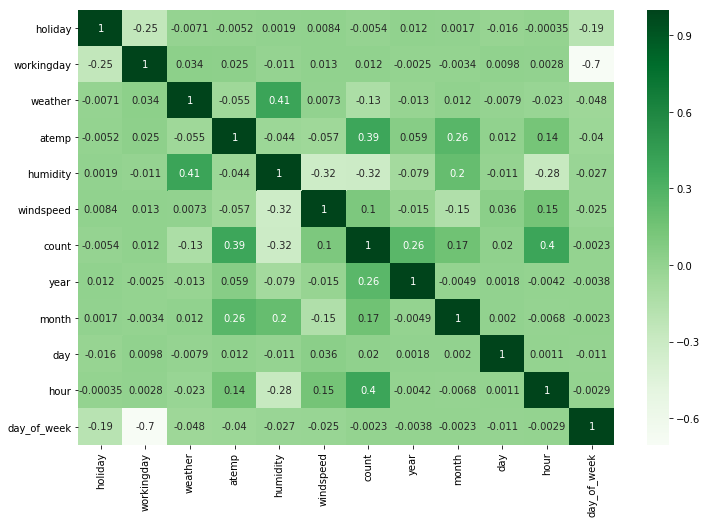

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcopy.corr(), annot=True, cmap='Greens')

In [13]:
daily_use = dfcopy.groupby(['day_of_week', 'hour'])['count'].sum().unstack(0)

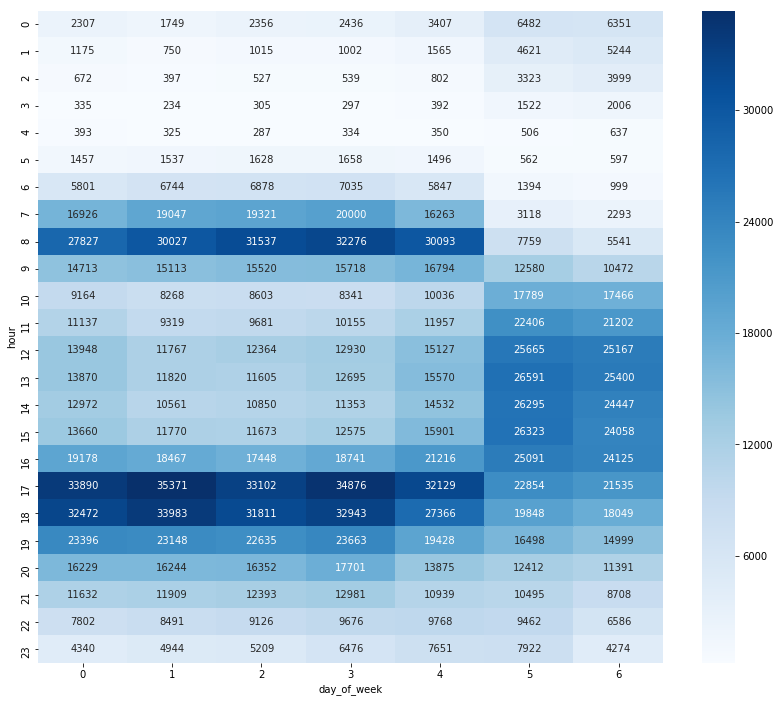

In [14]:
plt.figure(figsize =(14,12))
sns.heatmap(daily_use, annot=True, fmt='.0f', cmap = 'Blues')

#fmt='.0f' ensures numbers aren't to the power of 10

#### As we can see, during the week the most frequent use is during the morning and evening rush hours, whereas on the weekend it is more frequent during the day, between 9 a.m. and 7 p.m.

In [15]:
month_temp = dfcopy.groupby(['month', 'atemp'])['count'].sum().unstack(0)
month_temp.head(3)

month,1,2,3,4,5,6,7,8,9,10,11,12
atemp,,,,,,,,,,,,
0.760,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.515,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.275,227.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


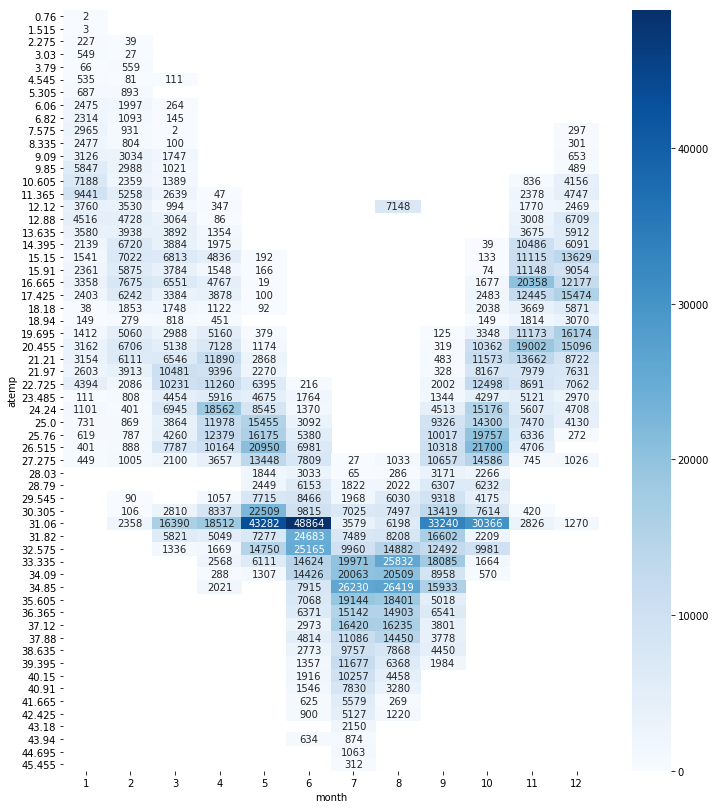

In [16]:
plt.figure(figsize=(12,14))
sns.heatmap(month_temp, annot=True, fmt='.0f', cmap = 'Blues')

#### Indicative of seasonal use - big spikes when it reaches 30+ in May and June (and September and October), showing lots of people excited to use bikes in lovely weather. Greater spread over the months of July and August as there is a greater distribution of high temperatures. The amount of use starts to drop off when temperatures become too excessive!

In [17]:
humidity = dfcopy.groupby(['month', 'humidity'])['count'].sum().unstack()
humidity

humidity,0,8,10,12,13,14,15,16,17,18,...,88,89,90,91,92,93,94,96,97,100
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128.0,NaN,NaN,NaN,152.0,2432.0,54.0,NaN,NaN,9.0
2,NaN,77.0,107.0,29.0,17.0,38.0,292.0,730.0,73.0,119.0,...,NaN,NaN,74.0,NaN,NaN,2409.0,NaN,71.0,NaN,1662.0
3,623.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,...,3319.0,NaN,NaN,NaN,NaN,1038.0,2143.0,NaN,NaN,459.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,413.0,1243.0,1020.0,...,1407.0,NaN,NaN,NaN,NaN,943.0,937.0,NaN,NaN,239.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15725.0,NaN,33.0,NaN,NaN,244.0,5405.0,NaN,NaN,1247.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2604.0,3022.0,NaN,NaN,NaN,NaN,667.0,NaN,NaN,13.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,427.0,NaN,...,15.0,2623.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,929.0,3629.0,NaN,119.0,NaN,NaN,206.0,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6196.0,6453.0,NaN,NaN,NaN,25.0,4351.0,NaN,64.0,494.0


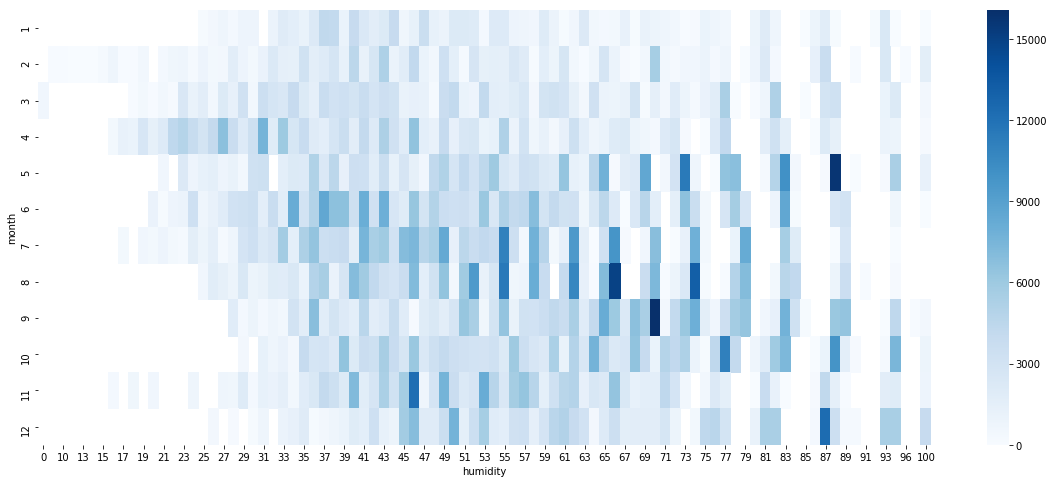

In [18]:
plt.figure(figsize=(20,8))
sns.heatmap(humidity, fmt='.0f', cmap = 'Blues')

In [19]:
dfcopy.groupby(['month'])['humidity'].median()

month
1     51
2     54
3     56
4     54
5     72
6     58
7     58
8     65
9     72
10    72
11    60
12    68
Name: humidity, dtype: int64

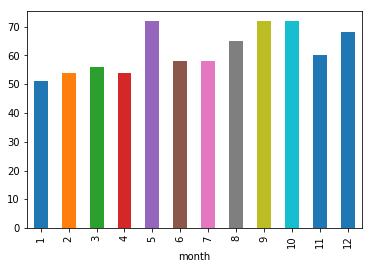

In [20]:
dfcopy.groupby(['month'])['humidity'].median().plot.bar()

### 2. Select columns for X and y

In [21]:
X = df.drop(columns='count')
y = df['count']

### 3. Train / Test Split

In [22]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 42)

In [23]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((8164, 11), (2722, 11), (8164,), (2722,))

### 4. **EDA**
### 5. **Feature engineering**

In [24]:
Xtrain.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
2930,2011-07-11 00:00:00,3,0,1,1,28.7,32.575,65,12.998,10,25


In [25]:
def datetime(df):
    
    df = df.copy()
    
    df['date and time'] = pd.to_datetime(df['datetime'])

    df['year'] = df['date and time'].dt.year
    df['month'] = df['date and time'].dt.month
    df['day'] = df['date and time'].dt.day
    df['hour'] = df['date and time'].dt.hour
    df['day_of_week'] = df['date and time'].dt.dayofweek

    df.drop(columns=['datetime','date and time'], inplace=True)
    df.drop(columns=['registered', 'casual','season', 'temp'], inplace=True)
    
    return df

In [26]:
Xtrain = datetime(Xtrain)

In [27]:
Xtrain.head(1)

,holiday,workingday,weather,atemp,humidity,windspeed,year,month,day,hour,day_of_week
2930,0,1,1,32.575,65,12.998,2011,7,11,0,0


### Baseline Score with Linear Regression - really bad model in this case!

In [28]:
m = LinearRegression()
m.fit(Xtrain,ytrain)
print(f'R^2 i.e. Accuracy Train Score for Linear Regression: {m.score(Xtrain,ytrain)}')

R^2 i.e. Accuracy Train Score for Linear Regression: 0.3895675706535049


In [29]:
ypred = m.predict(Xtrain)

In [30]:
ypred

array([109.42932316, 353.53475309, 174.73856266, ..., 202.63318466,
       162.73854997, 139.71829385])

In [31]:
len(ypred)

8164

#### We want to get rid of negative numbers!

In [32]:
# simple method to get rid of negative numbers
len(ypred[ypred < 0])

372

In [33]:
ypred[ypred < 0] = 0

In [34]:
mean_squared_log_error(ytrain, ypred)

1.681861476350107

In [35]:
print('Root mean-squared logarithmic error: ', np.sqrt(mean_squared_log_error(ytrain, ypred)))

Root mean-squared logarithmic error:  1.2968660209713674


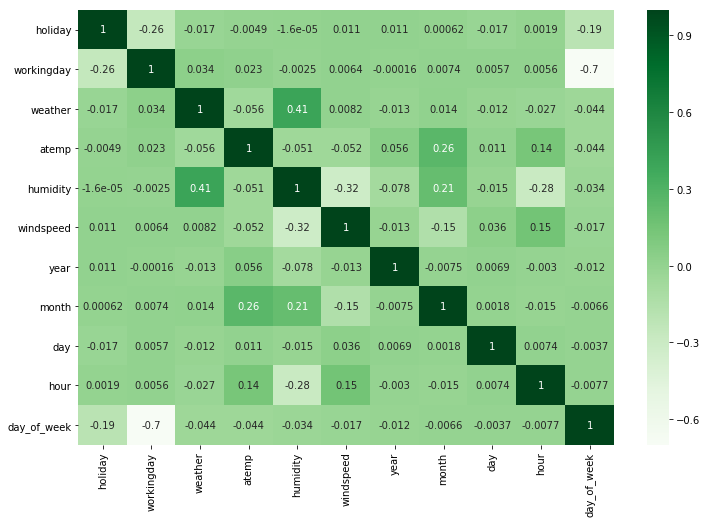

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(Xtrain.corr(), annot=True, cmap='Greens')

/Users/maximcondon/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


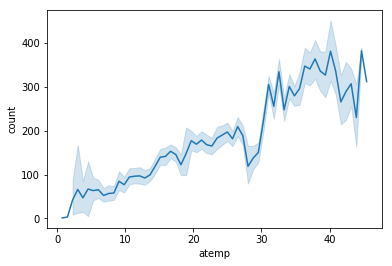

In [37]:
sns.lineplot(x= Xtrain['atemp'], y=y)
plt.show()

In [38]:
Xtrain.head(1)

,holiday,workingday,weather,atemp,humidity,windspeed,year,month,day,hour,day_of_week
2930,0,1,1,32.575,65,12.998,2011,7,11,0,0


In [39]:
Xtrain_visualise = pd.concat([Xtrain, ytrain], axis=1)
Xtrain_visualise.head()

,holiday,workingday,weather,atemp,humidity,windspeed,year,month,day,hour,day_of_week,count
2930,0,1,1,32.575,65,12.9980,2011,7,11,0,0,35
7669,0,1,1,26.515,52,22.0028,2012,5,18,22,4,251
1346,0,1,1,15.910,61,6.0032,2011,4,1,23,4,53
9432,0,0,1,27.275,60,8.9981,2012,9,16,9,6,296
453,0,1,3,9.850,93,12.9980,2011,2,1,23,1,16


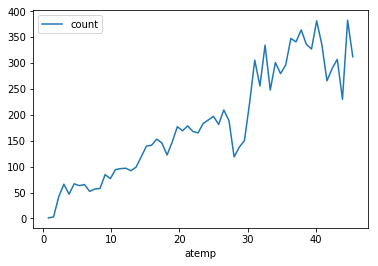

In [40]:
Xtrain_visualise.groupby('atemp')[['count']].mean().plot()

#### As temperature increases, people are more keen to cycle, with a small dropoff when it get excessively hot

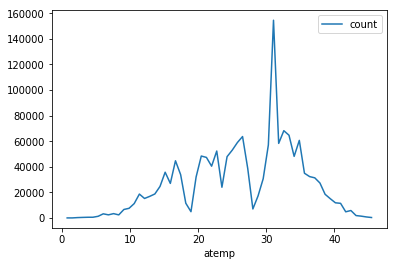

In [41]:
Xtrain_visualise.groupby('atemp')[['count']].sum().plot()

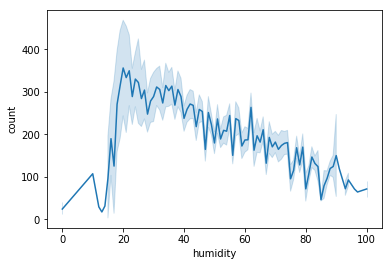

In [42]:
sns.lineplot(x=Xtrain['humidity'], y=y)

#### Generally as humidity increases, the popularity of bike rentals decreases

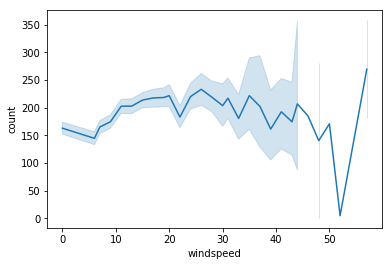

In [43]:
sns.lineplot(x=Xtrain['windspeed'], y=y)

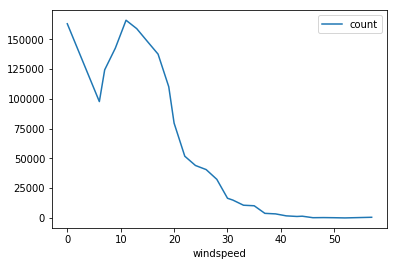

In [44]:
Xtrain_visualise.groupby('windspeed')[['count']].sum().plot()

#### As windspeed increases, the sum of cycles hired decreases, but due to their being far fewer days with extremely high windspeed that will always be the case. When we look at the mean count it has some variety but a line of best fit would be more or less straight!

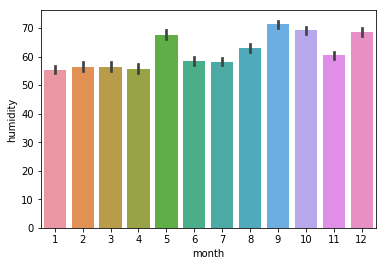

In [45]:
sns.barplot(x=Xtrain['month'], y=Xtrain['humidity'])
plt.show()

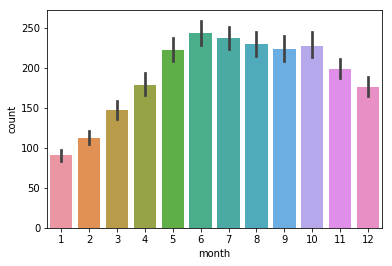

In [46]:
sns.barplot(x=Xtrain['month'], y=y)
plt.show()

#### Humidity: hard to draw conclusions as some of the most humid months are unpopular because the weather is bad, but some are very popular as the weather is good, it might be wise to bin humidity data to draw conclusions!

In [47]:
# set bin ranges
bins = [0,10,20,30,40,50,60,70,80,90,101]

In [48]:
Xtrain_visualise['humidity bin'] = pd.cut(Xtrain['humidity'], bins)

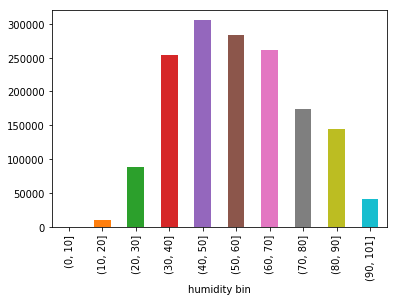

In [49]:
Xtrain_visualise.groupby('humidity bin')['count'].sum().plot.bar()

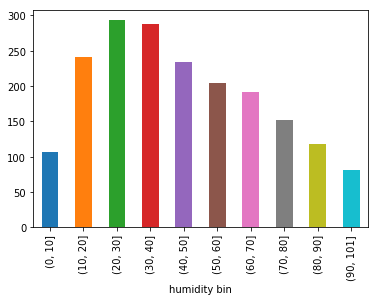

In [50]:
Xtrain_visualise.groupby('humidity bin')['count'].mean().plot.bar()

#### Much better! We can now see that lower-middle percentage humidity days are far more popular to go cycling on then higher ones, and that it's incredibly rare to have very low humidity days!

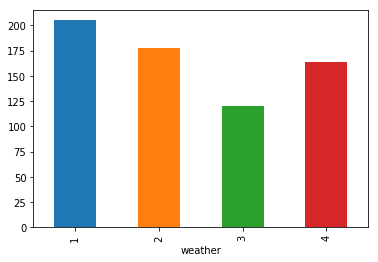

In [51]:
Xtrain_visualise.groupby('weather')['count'].mean().plot.bar()
plt.show()

In [52]:
Xtrain_visualise.groupby('weather')['count'].count()

weather
1    5406
2    2125
3     632
4       1
Name: count, dtype: int64

#### Recall:
1. Clear, Few clouds, Partly cloudy, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

#### Very strange that there's a spike on extremely bad weather days but as we can see there was only 1 day in the entire year that the weather was that bad so it's strange purely because we take the mean. Could remove that data point if we wanted.

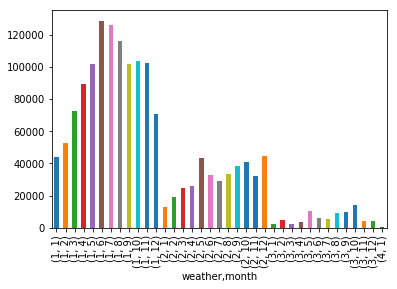

In [53]:
Xtrain_visualise.groupby(['weather', 'month'])['count'].sum().plot.bar()

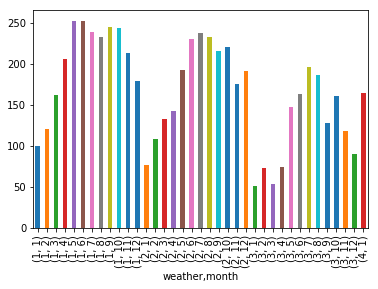

In [54]:
Xtrain_visualise.groupby(['weather', 'month'])['count'].mean().plot.bar()

#### As we can see the mean of the cycles hired decreases as the weather becomes worse, and the sum of the cycles used yearly shows overwhelmingly that people prefer to cycle in nice weather!

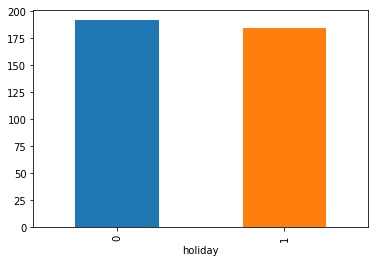

In [55]:
Xtrain_visualise.groupby('holiday')['count'].mean().plot.bar()
plt.show()

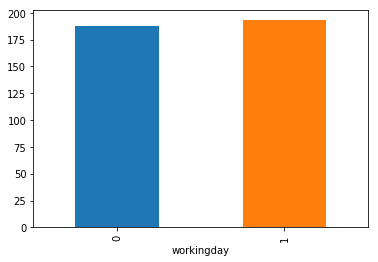

In [56]:
Xtrain_visualise.groupby('workingday', )['count'].mean().plot.bar()
plt.show()

#### Whether it's a working day, a weekend or a holiday there doesn't seem to be much variation in the mean number of bicycles rented - weather has a much greater effect!

### 6. Build / Train model


### RandomForestRegressor

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
Xtrain.head(1)

,holiday,workingday,weather,atemp,humidity,windspeed,year,month,day,hour,day_of_week
2930,0,1,1,32.575,65,12.998,2011,7,11,0,0


In [59]:
rf = RandomForestRegressor()
rf.fit(Xtrain,ytrain)
print('Accuracy Train Score for RandomForestRegressor: ',rf.score(Xtrain,ytrain))

/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy Train Score for RandomForestRegressor:  0.9885771486988191


In [60]:
ypred = rf.predict(Xtrain)

ypred[ypred < 0] = 0

mean_squared_log_error(ytrain, ypred)

print('Root mean-squared logarithmic error for Xtrain: ',np.sqrt(mean_squared_log_error(ytrain, ypred)))

Root mean-squared logarithmic error for Xtrain:  0.17458983036225972


#### Need to make a function that works for Xtest and test DataFrame

In [61]:
def datetime(df):
    
    df = df.copy()
    
    df['date and time'] = pd.to_datetime(df['datetime'])
    df['year'] = df['date and time'].dt.year
    df['month'] = df['date and time'].dt.month
    df['day'] = df['date and time'].dt.day
    df['hour'] = df['date and time'].dt.hour
    df['day_of_week'] = df['date and time'].dt.dayofweek

    df.drop(columns=['season', 'temp','date and time'], inplace=True)
    df.set_index('datetime', inplace=True)
    
    return df

In [62]:
Xtest = datetime(Xtest)

In [65]:
Xtest.drop(columns=['registered', 'casual'], inplace=True)

In [66]:
print('Accuracy Test Score for RandomForestRegressor: ',rf.score(Xtest,ytest))

Accuracy Test Score for RandomForestRegressor:  0.9482019016817873


In [67]:
ypred_Xtest = rf.predict(Xtest)

In [68]:
len(ypred_Xtest[ypred_Xtest < 0])

0

In [69]:
mean_squared_log_error(ytest, ypred_Xtest)

print('Root mean-squared logarithmic error for Xtest: ', np.sqrt(mean_squared_log_error(ytest, ypred_Xtest)))

Root mean-squared logarithmic error for Xtest:  0.3282864988494631


#### Now for the test DataFrame

In [70]:
test = datetime(test)

In [78]:
ypred_test = rf.predict(test)

ypred_test[ypred_test < 0] = 0

In [79]:
kaggleRandomForestRegressor = pd.DataFrame(data=ypred_test, index=test.index, columns = ['count'])

In [81]:
kaggleRandomForestRegressor.head()

,count
datetime,
2011-01-20 00:00:00,12.8
2011-01-20 01:00:00,7.0
2011-01-20 02:00:00,6.8
2011-01-20 03:00:00,3.4
2011-01-20 04:00:00,2.0


In [151]:
kaggleRandomForestRegressor.to_csv('kaggleRandomForestRegressor.csv')

#### Kaggle Score: 50.845%

### Hyperparameter optimisation

### GradientBoostingRegressor

In [131]:
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor

In [142]:
m = GradientBoostingRegressor()
m.fit(Xtrain,ytrain)
print('Accuracy Train Score at 1st attempt: ',m.score(Xtrain,ytrain))

Accuracy Train Score at 1st attempt:  0.8712754301967606


In [143]:
print('Accuracy Test Score for GradientBoostingRegressor: ',m.score(Xtest,ytest)) 

Accuracy Test Score for GradientBoostingRegressor:  0.8621944784533582


In [144]:
ypred = m.predict(Xtrain)

ypred[ypred < 0] = 0

mean_squared_log_error(ytrain, ypred)

print('Root mean-squared logarithmic error: ',np.sqrt(mean_squared_log_error(ytrain, ypred)))

Root mean-squared logarithmic error:  0.7327863249326365


In [145]:
ypred_test = m.predict(test)
ypred_test[ypred_test < 0] = 0

In [152]:
kaggleGradientBoostingRegressor = pd.DataFrame(data=ypred_test, index=test.index, columns = ['count'])
kaggleGradientBoostingRegressor.to_csv('kaggleGradientBoostingRegressor.csv')

#### Kaggle Score: 88.385%

### BaggingRegressor

In [156]:
m = BaggingRegressor()
m.fit(Xtrain,ytrain)
print('Accuracy Train Score for BaggingRegressor attempt: ',m.score(Xtrain,ytrain))
print('Accuracy Test Score for BaggingRegressor: ',m.score(Xtest,ytest)) 

ypred = m.predict(Xtrain)

ypred[ypred < 0] = 0

mean_squared_log_error(ytrain, ypred)

print('Root mean-squared logarithmic error: ',np.sqrt(mean_squared_log_error(ytrain, ypred)))

Accuracy Train Score for BaggingRegressor attempt:  0.9892066619318545
Accuracy Test Score for BaggingRegressor:  0.948982637830076
Root mean-squared logarithmic error:  0.1694484857085841


In [157]:
ypred_test = m.predict(test)
ypred_test[ypred_test < 0] = 0

In [160]:
kaggleBaggingRegressor = pd.DataFrame(data=ypred_test, index=test.index, columns = ['count'])
kaggleBaggingRegressor.to_csv('kaggleBaggingRegressor.csv')

#### Kaggle Score: 51.343%

### 7. Cross validate
### 8. Assess model quality
### 9. Optimise hyperparameters
### 10. Quantify error